# Business Analysis by Neighborhood in Richmond, VA

### This notebook conducts an exploration of the business landscape in Richmond, Virginia, using data from the US Census Bureau, Internal Revenue Service, Foursquare API, and the City of Richmond.

## 1. Import packages. 

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # library to handle data in a vectorized manner


# import k-means from clustering stage
from sklearn.cluster import KMeans



#print('Folium installed')
print('Libraries imported.')

Libraries imported.


In [2]:

# uncomment this line if you haven't completed the Foursquare API lab

import json # library to handle JSON files

!conda update -n base -c defaults conda
!conda install -c conda-forge geopy --yes 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs: 
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tqdm-4.48.2                |             py_0          63 KB
    conda-package-handling-1.6.1|   py37h7b6447c_0         886 KB
    conda-4.8.4                |           py37_0         3.0 MB
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be INSTALLED:

    conda-package-handling: 1.6.1-py37h7b6447c_0
    tqdm:                   4.48.2-py_0         

The following packages will be UPDATED:

    conda:                  4.5.12-py37_0        --> 4.8.4-py37_0


tqdm-4.48.2          | 63 KB     | ##################################### | 100% 
conda-package-handli | 886 KB    | ###################################

## 2. Upload Richmond Neighborhood Data.

### Connect to Foursquare and read Neighborhood Parcel Data.

In [43]:
#Connect to Foursquare
CLIENT_ID = 'A33NHVDRBNJWC0QNEBJV315KULCXZKL0MJE1NPC3RMQRFMNS' # your Foursquare ID
CLIENT_SECRET = 'JMTKXRHYIFUQAQZEESQIJWY55AO3XMJT2O0I3XUMEPWJPUJQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: A33NHVDRBNJWC0QNEBJV315KULCXZKL0MJE1NPC3RMQRFMNS
CLIENT_SECRET:JMTKXRHYIFUQAQZEESQIJWY55AO3XMJT2O0I3XUMEPWJPUJQ


In [44]:
# Upload Richmond Neighborhood Parcel data.

parcels = pd.read_csv("https://data.richmondgov.com/api/views/b52i-7ygb/rows.csv?accessType=DOWNLOAD",)

In [45]:
parcels.tail()

,PIN_PIN,ARTINCZ_Name,BG10_ID,BG00_ID,BG90_ID,BLOCK10_Name,BLOCK00_Name,BLOCK90_Name,BULK_Schedule,CARE_Name,CHESBAY_Flag,CIVIC_ID1,CIVIC_ID2,CIVIC_ID3,CIVIC_ID4,CIVIC_ID5,CIVIC_Name1,CIVIC_Name2,CIVIC_Name3,CIVIC_Name4,CIVIC_Name5,CODEINSP_ID,CONGRESS_Name,COUNCIL_Name,CUP_Flag,DESOVER_Name,DISPTCHZ_Name,EZ_Name,FIREDIST_Name,FLOOD500_Flag,HDCITY_Name,HDNATREG_Name,HOA_Name,HOUSE00_Name,LEAF_Schedule,LUPLAN_ID,LUPLAN_Name,NGHOOD_ID,NGHOOD_Name,NIBIA_Name,NIBTA_Name,PLGDIST_Name,POLPREC_Name,POLSECTR_Name,POLTAZ_Name,RCA_Name,REFUSE_ID,SCHZELEM_ID,SCHZELEM_Name,SCHZHIGH_ID,SCHZHIGH_Name,SCHZMID_ID,SCHZMID_Name,SENATE00_Name,SPASMTDT_Name,SUP_Flag,SWEEP_Schedule,TAZ_Name,TRACT10_ID,TRACT10_Name,TRACT00_ID,TRACT00_Name,TRACT90_ID,TRACT90_Name,VOTPREC_Name,WETLAND_Flag,ZIP_Name,ZONING_Name,Location 1
74257,S0071682011,NaN,607005,607003,607983.0,5002,3000,301,NaN,NaN,Y,30.0,NaN,NaN,NaN,NaN,Bellemeade Civic Association,NaN,NaN,NaN,NaN,2034,4,6,NaN,NaN,152C,NaN,21,Y,NaN,NaN,NaN,69,TBD,SF-LD,Single-Family (Low Density),BLMD,Bellemeade,NaN,Bellemeade,Old South,2,213,152,NaN,Thursday,333,Oak Grove,107,Wythe,218,Boushall,16,NaN,NaN,TBD,1203,60700,607.0,60700,607.0,60798.0,607.98,610,N,23224,R-53,"(37.492925, -77.437652)"
74258,C0070176033,NaN,707001,707001,707001.0,1005,1040,146,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,4,9,NaN,NaN,176B,NaN,23,N,NaN,NaN,NaN,69,TBD,SF-LD,Single-Family (Low Density),SWNS,Swanson,NaN,NaN,Midlothian,2,212,176,NaN,Tuesday,354,GH Reid,115,Huguenot,216,Elkhardt,10,NaN,NaN,TBD,1178,70700,707.0,70700,707.0,70700.0,707.00,910,N,23225,R-4,"(37.49336, -77.493823)"
74259,W0190032034,NaN,502001,502001,NaN,1007,1004,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3061,4,1,NaN,NaN,061A,III,18,N,NaN,NaN,NaN,68,TBD,NOMU,Nodal Mixed-Use,MNPK,Monument Avenue Park,NaN,NaN,Far West,3,311,61,NaN,Monday,330,Mary Munford,102,Jefferson,208,Hill,10,NaN,NaN,TBD,1067,50200,502.0,50200,502.0,NaN,NaN,111,N,23230,RO-2,"(37.580751, -77.494745)"
74260,W0000457003,NaN,404002,404002,404002.0,2010,2013,203,NaN,NaN,N,350.0,NaN,NaN,NaN,NaN,Fan District Association,NaN,NaN,NaN,NaN,3025,4,2,NaN,NaN,034B,NaN,10,N,NaN,Fan Area,NaN,71,TBD,SF-MD,Single-Family (Medium Density),FAN,The Fan,NaN,NaN,Near West,3,313,34,NaN,Wednesday,317,Fox,102,Jefferson,202,Binford,9,NaN,NaN,TBD,1096,40400,404.0,40400,404.0,40400.0,404.00,208,N,23220,R-6,"(37.548473, -77.457081)"
74261,E0100136013,NaN,212001,212001,212001.0,1031,1030,108,NaN,NaN,Y,450.0,NaN,NaN,NaN,NaN,Greater Fulton Hill Civic Association,NaN,NaN,NaN,NaN,1007,4,7,NaN,NaN,113A,NaN,8,N,NaN,NaN,NaN,71,TBD,SF-LD,Single-Family (Low Density),FLTN,Fulton,NaN,NaN,East,1,111,113,NaN,Thursday,305,Bellevue,108,Armstrong,212,Martin Luther King Jr,16,NaN,NaN,TBD,1086,21200,212.0,21200,212.0,21200.0,212.00,706,N,23231,R-5,"(37.511661, -77.398516)"


In [46]:
parcels["PLGDIST_Name"].unique()

array(['Far West', 'Broad Rock', 'Near West', 'Old South', 'North',
       'Midlothian', 'East', 'Downtown', 'Huguenot'], dtype=object)

In [47]:
parcels_filtered = parcels[["PIN_PIN", "NGHOOD_Name", "PLGDIST_Name", "ZIP_Name", "Location 1"]]

In [48]:
parcels_filtered.head()

,PIN_PIN,NGHOOD_Name,PLGDIST_Name,ZIP_Name,Location 1
0,W0200131004,Westhampton,Far West,23226,"(37.57451, -77.51294)"
1,C0091026030,Walmsley,Broad Rock,23234,"(37.465054, -77.463377)"
2,C0090252024,Cofer,Broad Rock,23224,"(37.494482, -77.458668)"
3,W0001772005,Mary Munford,Far West,23221,"(37.560683, -77.491232)"
4,W0210106005,Three Chopt,Far West,23226,"(37.586667, -77.524455)"


In [49]:
neighborhoods = parcels_filtered[["NGHOOD_Name","PLGDIST_Name", "ZIP_Name", "Location 1"]]

In [50]:
neighborhoods = neighborhoods.drop_duplicates(subset="NGHOOD_Name", keep= 'first', inplace= False)

In [51]:
neighborhoods.head()
neighborhoods.shape

(148, 4)

In [52]:
neighborhoods

,NGHOOD_Name,PLGDIST_Name,ZIP_Name,Location 1
0,Westhampton,Far West,23226,"(37.57451, -77.51294)"
1,Walmsley,Broad Rock,23234,"(37.465054, -77.463377)"
2,Cofer,Broad Rock,23224,"(37.494482, -77.458668)"
3,Mary Munford,Far West,23221,"(37.560683, -77.491232)"
4,Three Chopt,Far West,23226,"(37.586667, -77.524455)"
5,Scott's Addition,Near West,23230,"(37.576031, -77.474124)"
6,Blackwell,Old South,23224,"(37.515933, -77.447293)"
7,British Camp Farms,Broad Rock,23234,"(37.471175, -77.480526)"
8,Broad Rock,Old South,23224,"(37.505344, -77.465764)"
9,Northern Barton Heights,North,23222,"(37.567263, -77.431555)"


## 3. Upload Income Data.

In [53]:
# Load VA income data
income = pd.read_csv("https://github.com/jcomstock06/Coursera_Capstone/raw/master/irs_income_va17.csv")

In [54]:
income.head(20)

,ZIP code [1],Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number of electronically filed returns,Number of computer prepared paper returns,Number with paid preparer's signature,Number of returns with direct deposit,Number of exemptions,Number of dependent exemptions,Number of volunteer prepared returns [2],Unnamed: 13,Unnamed: 14,Unnamed: 15,Number of refund anticipation check returns [3],Number of elderly returns [4],Adjusted gross income (AGI) [5],Total income,Unnamed: 20,Salaries and wages in AGI,Unnamed: 22,Taxable interest,Unnamed: 24,Ordinary dividends,Unnamed: 26,Qualified dividends [6],Unnamed: 28,State and local income tax refunds,Unnamed: 30,Business or profession net income (less loss),Unnamed: 32,Net capital gain (less loss) in AGI,Unnamed: 34,Taxable individual retirement arrangement distributions,Unnamed: 36,Pensions and annuities in AGI,Unnamed: 38,Number of farm returns,Unemployment compensation [7],Unnamed: 41,Taxable Social Security benefits,Unnamed: 43,Partnership/S-corp net income (less loss),Unnamed: 45,Total statuory adjustments,Unnamed: 47,Educator expenses,Unnamed: 49,Self-employed (Keogh) retirement plans,Unnamed: 51,Self-employed health insurance deduction,Unnamed: 53,Individual retirement arrangement payments,Unnamed: 55,Student loan interest deduction,Unnamed: 57,Tuition and fees deduction,Unnamed: 59,Domestic production activities deduction,Unnamed: 61,Total itemized deductions,Unnamed: 63,Unnamed: 64,Total medical and dental expenses deduction,Unnamed: 66,State and local income taxes,Unnamed: 68,State and local general sales taxes,Unnamed: 70,Real estate taxes,Unnamed: 72,Personal property taxes,Unnamed: 74,Total taxes paid,Unnamed: 76,Home mortgage interest paid,Unnamed: 78,Home mortgage interest paid to personal seller,Unnamed: 80,Deductible points,Unnamed: 82,Qualified mortgage insurance premiums,Unnamed: 84,Investment interest paid,Unnamed: 86,Total charitable contributions,Unnamed: 88,Net limited miscellaneous deduction,Unnamed: 90,Gambling loss deduction and other non-limited miscellaneous deduction,Unnamed: 92,Taxable income,Unnamed: 94,Income tax before credits,Unnamed: 96,Alternative minimum tax,Unnamed: 98,Excess advance premium tax credit repayment,Unnamed: 100,Total tax credits,Unnamed: 102,Foreign tax credit,Unnamed: 104,Child and dependent care credit,Unnamed: 106,Nonrefundable education credit,Unnamed: 108,Retirement savings contributions credit,Unnamed: 110,Child tax credit,Unnamed: 112,Residential energy tax credit,Unnamed: 114,Self-employment tax,Unnamed: 116,Total premium tax credit,Unnamed: 118,Advance premium tax credit,Unnamed: 120,Health care individual responsibility payment,Unnamed: 122,Total tax payments,Unnamed: 124,Earned income credit [8],Unnamed: 126,Excess earned income credit (refundable) [9],Unnamed: 128,Additional child tax credit,Unnamed: 130,Refundable education credit,Unnamed: 132,Net premium tax credit,Unnamed: 134,Income tax [10],Unnamed: 136,Total tax liability [11],Unnamed: 138,Total additional Medicare tax,Unnamed: 140,Net investment income tax,Unnamed: 142,Tax due at time of filing [12],Unnamed: 144,Total overpayments,Unnamed: 146,Overpayments refunded [13],Unnamed: 148,Credited to next year's estimated tax,Unnamed: 150
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,Number of volunteer income tax assistance (VIT...,Number of tax counseling for the elderly (TCE)...,Number of volunteer prepared \nreturns with\nE...,NaN,NaN,NaN,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,NaN,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of ret

In [55]:
income.columns

Index(['ZIP\ncode [1]', 'Size of adjusted gross income', 'Number of returns',
       'Number of single returns', 'Number of joint returns',
       'Number of head of household returns',
       'Number of electronically filed returns',
       'Number of computer prepared paper returns',
       'Number with paid preparer's signature',
       'Number of returns with direct deposit',
       ...
       'Net investment income tax', 'Unnamed: 142',
       'Tax due at time of filing [12]', 'Unnamed: 144', 'Total overpayments',
       'Unnamed: 146', 'Overpayments refunded [13]', 'Unnamed: 148',
       'Credited to next year's estimated tax', 'Unnamed: 150'],
      dtype='object', length=151)

In [56]:
# Clean income data:
# Create new df with zip code, TOTAL income rows, Total income column
income_byzip = income[["ZIP\ncode [1]", 'Size of adjusted gross income', 'Total income',]]

In [57]:
income_byzip.head()

,ZIP code [1],Size of adjusted gross income,Total income
0,NaN,NaN,Number of returns
1,NaN,Size of adjusted gross income,(18)
2,0,Total,"3,918,340"
3,0,"$1 under $25,000",1225710
4,0,"$25,000 under $50,000",878270


In [58]:
income_byzip = income_byzip[income_byzip["Size of adjusted gross income"] == "Total"]

In [59]:
income_byzip.head(10)

,ZIP code [1],Size of adjusted gross income,Total income
2,0,Total,"3,918,340"
10,20105,Total,"11,940"
18,20106,Total,"2,320"
26,20109,Total,"19,400"
34,20110,Total,"22,470"
42,20111,Total,"17,880"
50,20112,Total,"13,230"
58,20115,Total,"2,750"
66,20117,Total,860
74,20119,Total,"2,000"


In [60]:
income_byzip = income_byzip.rename(columns = {"ZIP\ncode [1]":'ZIP_Name'})
#income.head()

In [61]:
income_byzip.head()

,ZIP_Name,Size of adjusted gross income,Total income
2,0,Total,"3,918,340"
10,20105,Total,"11,940"
18,20106,Total,"2,320"
26,20109,Total,"19,400"
34,20110,Total,"22,470"


In [62]:
income_byzip.shape

(794, 3)

## 4. Merge Neighborhood and Income Data.

In [63]:
neighborhoods.dtypes

NGHOOD_Name     object
PLGDIST_Name    object
ZIP_Name         int64
Location 1      object
dtype: object

In [64]:
income_byzip.dtypes

ZIP_Name                         object
Size of adjusted gross income    object
Total income                     object
dtype: object

In [65]:
income_byzip["Total income"] = income_byzip["Total income"].astype(str) #.str.replace(',', '').astype(int)

In [66]:
income_byzip["Total income"] = income_byzip["Total income"].str.replace(',', '')

In [67]:
income_byzip["Total income"] = income_byzip["Total income"].astype(int)

In [68]:
income_byzip["ZIP_Name"] = income_byzip["ZIP_Name"].astype(int)

In [69]:
richmond = pd.merge(neighborhoods, income_byzip, on = "ZIP_Name" )

In [70]:
richmond

,NGHOOD_Name,PLGDIST_Name,ZIP_Name,Location 1,Size of adjusted gross income,Total income
0,Westhampton,Far West,23226,"(37.57451, -77.51294)",Total,8480
1,Three Chopt,Far West,23226,"(37.586667, -77.524455)",Total,8480
2,Willow lawn,Far West,23226,"(37.571816, -77.495814)",Total,8480
3,Wilton,Far West,23226,"(37.56867, -77.522811)",Total,8480
4,Country Club of Virginia,Far West,23226,"(37.568536, -77.526293)",Total,8480
5,Stonewall Court,Far West,23226,"(37.571677, -77.507971)",Total,8480
6,Walmsley,Broad Rock,23234,"(37.465054, -77.463377)",Total,20630
7,British Camp Farms,Broad Rock,23234,"(37.471175, -77.480526)",Total,20630
8,Jeff Davis,Broad Rock,23234,"(37.465811, -77.439596)",Total,20630
9,Belmont Woods,Broad Rock,23234,"(37.464432, -77.497217)",Total,20630


### Clean and refine merged data frame. Split Location into Latitude and Longitude. Rename "Total income" to "Zip Code Total Income". 

In [71]:
richmond["Location 1"] = richmond["Location 1"].str.replace('(', '')
richmond["Location 1"] = richmond["Location 1"].str.replace(')', '')
richmond[['Latitude', 'Longitude']] = richmond["Location 1"].str.split(',', expand= True)
richmond = richmond.rename(columns = {"NGHOOD_Name":'Neighborhood', "PLGDIST_Name":"Planning_district", "Total income": "Zip_total_income"})

In [72]:
richmond = richmond.drop(columns={"Location 1"})
richmond.head()

,Neighborhood,Planning_district,ZIP_Name,Size of adjusted gross income,Zip_total_income,Latitude,Longitude
0,Westhampton,Far West,23226,Total,8480,37.57451,-77.51294
1,Three Chopt,Far West,23226,Total,8480,37.586667,-77.524455
2,Willow lawn,Far West,23226,Total,8480,37.571816,-77.495814
3,Wilton,Far West,23226,Total,8480,37.56867,-77.522811
4,Country Club of Virginia,Far West,23226,Total,8480,37.568536,-77.526293


In [73]:
richmond = richmond.drop(columns={"Size of adjusted gross income"})

In [74]:
richmond.dtypes
richmond.shape

(147, 6)

In [75]:
richmond[['Neighborhood','Planning_district','ZIP_Name']] = richmond[['Neighborhood','Planning_district','ZIP_Name']].astype(str)

In [76]:
richmond.dtypes

Neighborhood         object
Planning_district    object
ZIP_Name             object
Zip_total_income      int64
Latitude             object
Longitude            object
dtype: object

## 5. Begin Map View and Foursquare Research.

In [77]:
address = 'Richmond, VA'

geolocator = Nominatim(user_agent="richmond_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Richmond are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Richmond are 37.5385087, -77.43428.


In [78]:
map_richmond = folium.Map(location=[latitude, longitude], zoom_start=12)
map_richmond

In [79]:
richmond.dtypes

Neighborhood         object
Planning_district    object
ZIP_Name             object
Zip_total_income      int64
Latitude             object
Longitude            object
dtype: object

In [80]:
#df["a"] = pd.to_numeric(df["a"])
richmond['Latitude'] = pd.to_numeric(richmond['Latitude'])
richmond['Longitude'] = pd.to_numeric(richmond['Longitude'])

In [81]:
richmond.dtypes

Neighborhood          object
Planning_district     object
ZIP_Name              object
Zip_total_income       int64
Latitude             float64
Longitude            float64
dtype: object

In [82]:
# add markers to map

#for lat, lng, borough, neighborhood in zip(toronto_geo['Latitude'], toronto_geo['Longitude'], toronto_geo['Borough'], toronto_geo['Neighborhood']):

for lat, lng, planning, neighborhood in zip(richmond['Latitude'], richmond['Longitude'], richmond['Planning_district'], richmond['Neighborhood']):
    label = '{}, {}'.format(neighborhood, planning)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_richmond)  
    
display(map_richmond)

## Begin neighborhood venue analysis with Foursquare

In [83]:
#Explore first neighborhood
neighborhood_latitude = richmond.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = richmond.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = richmond.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Westhampton are 37.57451, -77.51294.


In [84]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=A33NHVDRBNJWC0QNEBJV315KULCXZKL0MJE1NPC3RMQRFMNS&client_secret=JMTKXRHYIFUQAQZEESQIJWY55AO3XMJT2O0I3XUMEPWJPUJQ&v=20180604&ll=37.57451,-77.51294&radius=500&limit=100'

In [85]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f64feb28f65ba55d0b30dfd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Westhampton',
  'headerFullLocation': 'Westhampton, Richmond',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 20,
  'suggestedBounds': {'ne': {'lat': 37.5790100045, 'lng': -77.50727279908354},
   'sw': {'lat': 37.570009995499994, 'lng': -77.51860720091646}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b09bf2df964a520d61c23e3',
       'name': 'Palani Drive',
       'location': {'address': '401 Libbie Ave',
        'crossStreet': 'York Rd.',
        'lat': 37.57472672552783,
        'lng': -77.51783536750462,
 

In [86]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Get results for first neighborhood:

In [87]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Palani Drive,American Restaurant,37.574727,-77.517835
1,The Continental Westhampton,American Restaurant,37.573291,-77.517266
2,Yellow Umbrella Fresh Seafood,Fish Market,37.577710,-77.512544
3,Superstars Pizza,Pizza Place,37.578604,-77.512979
4,Kiss & Make-up,Lingerie Store,37.577928,-77.511845


In [88]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):   
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Apply to all of Richmond

In [89]:
richmond_venues = getNearbyVenues(names=richmond['Neighborhood'],
                                   latitudes=richmond['Latitude'],
                                   longitudes=richmond['Longitude'])

Westhampton
Three Chopt
Willow lawn
Wilton
Country Club of Virginia
Stonewall Court
Walmsley
British Camp Farms
Jeff Davis
Belmont Woods
Deerbourne
Cottrell Farms
Davee Gardens
Commerce Road Industrial Area
Cherry Gardens
Cullenwood
Brookbury
Parnell Industrial Area
Cofer
Blackwell
Broad Rock
Oak Grove
South Garden
Bellemeade
Piney Knolls
McGuire
Hickory Hill
McGuire Manor
Manchester
Swansboro West
Hillside Court
Fawnbrook
Belt Center
Old Town Manchester
Broad Rock Sports Complex
McGuire Veterans Hospital
Woodhaven
Ancarows Landing
Maury
Broad Rock Industrial Park
Brookhaven Farms
Southwood
Windsor
Mary Munford
The Museum District
Carytown
Colonial Place
Malvern Gardens
Stadium
Carillon
Windsor Farms
Scott's Addition
Sauer's Gardens
Monument Avenue Park
Northern Barton Heights
Brookland Park
Highland Terrace
Ginter Park
Providence Park
Edgewood
Highland Park Southern Tip
North Highland Park
Green Park
Washington Park
Southern Barton Heights
Magnolia Industrial Center
Westover Hills Wes

In [90]:
print(richmond_venues.shape)
richmond_venues.head()

(1254, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Westhampton,37.57451,-77.51294,Palani Drive,37.574727,-77.517835,American Restaurant
1,Westhampton,37.57451,-77.51294,The Continental Westhampton,37.573291,-77.517266,American Restaurant
2,Westhampton,37.57451,-77.51294,Yellow Umbrella Fresh Seafood,37.577710,-77.512544,Fish Market
3,Westhampton,37.57451,-77.51294,Superstars Pizza,37.578604,-77.512979,Pizza Place
4,Westhampton,37.57451,-77.51294,Kiss & Make-up,37.577928,-77.511845,Lingerie Store


In [91]:
print('There are {} unique categories.'.format(len(richmond_venues['Venue Category'].unique())))

There are 226 unique categories.


### Analyze each neighborhood.

In [92]:
# one hot encoding
richmond_onehot = pd.get_dummies(richmond_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
richmond_onehot['Neighborhood'] = richmond_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [richmond_onehot.columns[-1]] + list(richmond_onehot.columns[:-1])
richmond_onehot = richmond_onehot[fixed_columns]

richmond_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts School,Massage Studio,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightlife Spot,Noodle House,Optical Shop,Other Great Outdoors,Other Repair Shop,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Print Shop,Pub,Racetrack,Record Shop,Recycling Facility,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Summer Camp,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Volleyball Court,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Westhampton,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Westhampton,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [93]:
richmond_onehot.shape

(1254, 227)

In [94]:
richmond_grouped = richmond_onehot.groupby('Neighborhood').mean().reset_index()
richmond_grouped

,Neighborhood,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts School,Massage Studio,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightlife Spot,Noodle House,Optical Shop,Other Great Outdoors,Other Repair Shop,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Print Shop,Pub,Racetrack,Record Shop,Recycling Facility,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Summer Camp,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Volleyball Court,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Ancarows Landing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,

### Confirm size of new data frame.

In [95]:
print("The shape of the new richmond_grouped dataframe is: ", richmond_grouped.shape)

The shape of the new richmond_grouped dataframe is:  (135, 227)


## Find top 5 venues in each neighborhood

In [96]:
num_top_venues = 5

for hood in richmond_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = richmond_grouped[richmond_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ancarows Landing----
                  venue  freq
0                  Pool   0.2
1            Food Court   0.2
2                  Park   0.2
3  Gym / Fitness Center   0.2
4        Shipping Store   0.2


----Beaufont----
                venue  freq
0  Mexican Restaurant  0.14
1      Discount Store  0.07
2   Korean Restaurant  0.07
3    Storage Facility  0.07
4          Taco Place  0.07


----Belle and Mayo Islands----
      venue  freq
0     River   0.2
1     Beach   0.2
2     Trail   0.2
3  Gym Pool   0.2
4      Park   0.2


----Bellemeade----
                           venue  freq
0                  Grocery Store  0.25
1              Convenience Store  0.25
2             Salon / Barbershop  0.25
3  Paper / Office Supplies Store  0.25
4              Other Repair Shop  0.00


----Bellevue----
                venue  freq
0         Flower Shop  0.33
1                 Bar  0.17
2  Italian Restaurant  0.17
3            Pharmacy  0.17
4        Gourmet Shop  0.17


----Belt Center----
   

## Put neighborhood venues into data frame.

In [97]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [98]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = richmond_grouped['Neighborhood']

for ind in np.arange(richmond_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(richmond_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ancarows Landing,Pool,Gym / Fitness Center,Park,Shipping Store,Food Court,English Restaurant,Food & Drink Shop,Food,Flower Shop,Fish Market
1,Beaufont,Mexican Restaurant,Market,Chinese Restaurant,Storage Facility,Fried Chicken Joint,Seafood Restaurant,Taco Place,Korean Restaurant,Sandwich Place,Restaurant
2,Belle and Mayo Islands,Park,Trail,River,Beach,Gym Pool,Farmers Market,Event Service,Event Space,Falafel Restaurant,Yoga Studio
3,Bellemeade,Salon / Barbershop,Convenience Store,Paper / Office Supplies Store,Grocery Store,Electronics Store,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant
4,Bellevue,Flower Shop,Bar,Pharmacy,Italian Restaurant,Gourmet Shop,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Food


In [99]:
neighborhoods_venues_sorted.shape

(135, 11)

In [100]:
richmond.head()

,Neighborhood,Planning_district,ZIP_Name,Zip_total_income,Latitude,Longitude
0,Westhampton,Far West,23226,8480,37.574510,-77.512940
1,Three Chopt,Far West,23226,8480,37.586667,-77.524455
2,Willow lawn,Far West,23226,8480,37.571816,-77.495814
3,Wilton,Far West,23226,8480,37.568670,-77.522811
4,Country Club of Virginia,Far West,23226,8480,37.568536,-77.526293


In [101]:
richmond_zips = richmond[['Neighborhood', 'ZIP_Name', 'Zip_total_income']]
richmond_zips.head()


,Neighborhood,ZIP_Name,Zip_total_income
0,Westhampton,23226,8480
1,Three Chopt,23226,8480
2,Willow lawn,23226,8480
3,Wilton,23226,8480
4,Country Club of Virginia,23226,8480


### Add zip code data into "grouped by" data frame to introduce zip code and income as factors for k-means.

In [102]:
richmond_grouped = pd.merge(richmond_grouped, richmond_zips, on= "Neighborhood")
richmond_grouped.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts School,Massage Studio,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightlife Spot,Noodle House,Optical Shop,Other Great Outdoors,Other Repair Shop,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Print Shop,Pub,Racetrack,Record Shop,Recycling Facility,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Summer Camp,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Volleyball Court,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,ZIP_Name,Zip_total_income
0,Ancarows Landing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [103]:
neighborhoods_venues_sorted = pd.merge(neighborhoods_venues_sorted, richmond_zips, on= "Neighborhood")
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ZIP_Name,Zip_total_income
0,Ancarows Landing,Pool,Gym / Fitness Center,Park,Shipping Store,Food Court,English Restaurant,Food & Drink Shop,Food,Flower Shop,Fish Market,23224,16330
1,Beaufont,Mexican Restaurant,Market,Chinese Restaurant,Storage Facility,Fried Chicken Joint,Seafood Restaurant,Taco Place,Korean Restaurant,Sandwich Place,Restaurant,23225,20110
2,Belle and Mayo Islands,Park,Trail,River,Beach,Gym Pool,Farmers Market,Event Service,Event Space,Falafel Restaurant,Yoga Studio,23219,2380
3,Bellemeade,Salon / Barbershop,Convenience Store,Paper / Office Supplies Store,Grocery Store,Electronics Store,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,23224,16330
4,Bellevue,Flower Shop,Bar,Pharmacy,Italian Restaurant,Gourmet Shop,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Food,23227,12540


In [104]:
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(['ZIP_Name_x', 'Zip_total_income_x',	'ZIP_Name_y', 'Zip_total_income_y'],1)

In [105]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ZIP_Name,Zip_total_income
0,Ancarows Landing,Pool,Gym / Fitness Center,Park,Shipping Store,Food Court,English Restaurant,Food & Drink Shop,Food,Flower Shop,Fish Market,23224,16330
1,Beaufont,Mexican Restaurant,Market,Chinese Restaurant,Storage Facility,Fried Chicken Joint,Seafood Restaurant,Taco Place,Korean Restaurant,Sandwich Place,Restaurant,23225,20110
2,Belle and Mayo Islands,Park,Trail,River,Beach,Gym Pool,Farmers Market,Event Service,Event Space,Falafel Restaurant,Yoga Studio,23219,2380
3,Bellemeade,Salon / Barbershop,Convenience Store,Paper / Office Supplies Store,Grocery Store,Electronics Store,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,23224,16330
4,Bellevue,Flower Shop,Bar,Pharmacy,Italian Restaurant,Gourmet Shop,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Food,23227,12540


## Use k-means algorithm to sort neighborhoods into clusters.

In [106]:
kclusters = 5

richmond_grouped_clustering = richmond_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(richmond_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 4, 1, 2, 1, 4, 1, 0, 3], dtype=int32)

In [107]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

richmond_merged = richmond

# merge richmond_grouped with richmond to add latitude/longitude for each neighborhood
richmond_merged = pd.merge(neighborhoods_venues_sorted.set_index('Neighborhood'),richmond_merged[['Neighborhood', 'Latitude', 'Longitude']], on='Neighborhood')

richmond_merged.head() # check the last columns!

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ZIP_Name,Zip_total_income,Latitude,Longitude
0,Ancarows Landing,1,Pool,Gym / Fitness Center,Park,Shipping Store,Food Court,English Restaurant,Food & Drink Shop,Food,Flower Shop,Fish Market,23224,16330,37.517429,-77.428161
1,Beaufont,3,Mexican Restaurant,Market,Chinese Restaurant,Storage Facility,Fried Chicken Joint,Seafood Restaurant,Taco Place,Korean Restaurant,Sandwich Place,Restaurant,23225,20110,37.506004,-77.513371
2,Belle and Mayo Islands,4,Park,Trail,River,Beach,Gym Pool,Farmers Market,Event Service,Event Space,Falafel Restaurant,Yoga Studio,23219,2380,37.527720,-77.456000
3,Bellemeade,1,Salon / Barbershop,Convenience Store,Paper / Office Supplies Store,Grocery Store,Electronics Store,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,23224,16330,37.492673,-77.442791
4,Bellevue,2,Flower Shop,Bar,Pharmacy,Italian Restaurant,Gourmet Shop,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Food,23227,12540,37.595071,-77.454698


In [108]:
richmond_merged = richmond_merged.dropna()
richmond_merged['Cluster Labels'] =richmond_merged['Cluster Labels'].astype(int)

### Code from https://towardsdatascience.com/data-visualization-with-python-folium-maps-a74231de9ef7

for lat, lon, traffic_q, traffic, bike, city in zip(df['latitude'], df['longitude'], df['traffic_index_quartile'], df['traffic_index'], df['bike_score'], df['city']):
    folium.CircleMarker(
        [lat, lon],
        radius=.15*bike,
        popup = ('City: ' + str(city).capitalize() + '<br>'
                 'Bike score: ' + str(bike) + '<br>'
                 'Traffic level: ' + str(traffic) +'%'
                ),
        color='b',
        key_on = traffic_q,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[traffic_q],
        fill=True,
        fill_opacity=0.7
        ).add_to(traffic_map)
traffic_map

In [109]:
#Another attempt at using Toronto code that worked...
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(richmond_merged['Latitude'], richmond_merged['Longitude'], richmond_merged['Neighborhood'], richmond_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [110]:
richmond_merged['Zip_total_income'].unique()

array([16330, 20110,  2380, 12540, 24430, 20630, 11970, 15050,  8400,
        8480, 18370, 16860,  4170])

## Run k-means again, with income levels excluded.

In [111]:
kclusters = 5

richmond_grouped_clustering1 = richmond_grouped.drop(columns = ['Neighborhood','ZIP_Name','Zip_total_income'])

richmond_grouped_clustering1.head()

,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Garden,Beer Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Carpet Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts School,Massage Studio,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightlife Spot,Noodle House,Optical Shop,Other Great Outdoors,Other Repair Shop,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Print Shop,Pub,Racetrack,Record Shop,Recycling Facility,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,River,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Summer Camp,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Volleyball Court,Waterfall,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.00000

In [112]:
# run k-means clustering
kmeans1 = KMeans(n_clusters=kclusters, random_state=0).fit(richmond_grouped_clustering1)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 4, 1, 2, 1, 4, 1, 0, 3], dtype=int32)

In [113]:
#create new df of neighborhood venues.
neighborhoods_venues_sorted1 = neighborhoods_venues_sorted.drop(columns='Cluster Labels')
neighborhoods_venues_sorted1.insert(0, 'Cluster Labels', kmeans.labels_)

richmond_merged1 = richmond

# merge richmond_grouped with richmond to add latitude/longitude for each neighborhood
richmond_merged1 = pd.merge(neighborhoods_venues_sorted1.set_index('Neighborhood'),richmond_merged1[['Neighborhood', 'Latitude', 'Longitude']], on='Neighborhood')

richmond_merged1.head() # check the last columns!

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ZIP_Name,Zip_total_income,Latitude,Longitude
0,Ancarows Landing,1,Pool,Gym / Fitness Center,Park,Shipping Store,Food Court,English Restaurant,Food & Drink Shop,Food,Flower Shop,Fish Market,23224,16330,37.517429,-77.428161
1,Beaufont,3,Mexican Restaurant,Market,Chinese Restaurant,Storage Facility,Fried Chicken Joint,Seafood Restaurant,Taco Place,Korean Restaurant,Sandwich Place,Restaurant,23225,20110,37.506004,-77.513371
2,Belle and Mayo Islands,4,Park,Trail,River,Beach,Gym Pool,Farmers Market,Event Service,Event Space,Falafel Restaurant,Yoga Studio,23219,2380,37.527720,-77.456000
3,Bellemeade,1,Salon / Barbershop,Convenience Store,Paper / Office Supplies Store,Grocery Store,Electronics Store,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,23224,16330,37.492673,-77.442791
4,Bellevue,2,Flower Shop,Bar,Pharmacy,Italian Restaurant,Gourmet Shop,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Food,23227,12540,37.595071,-77.454698


In [114]:
map_clusters1 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(richmond_merged1['Latitude'], richmond_merged1['Longitude'], richmond_merged1['Neighborhood'], richmond_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)
       
map_clusters1

In [115]:
cluster_dif = richmond_merged

In [116]:
cluster_dif['Cluster_wo_Income'] = richmond_merged1['Cluster Labels']

In [117]:
cluster_dif.head(20)

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ZIP_Name,Zip_total_income,Latitude,Longitude,Cluster_wo_Income
0,Ancarows Landing,1,Pool,Gym / Fitness Center,Park,Shipping Store,Food Court,English Restaurant,Food & Drink Shop,Food,Flower Shop,Fish Market,23224,16330,37.517429,-77.428161,1
1,Beaufont,3,Mexican Restaurant,Market,Chinese Restaurant,Storage Facility,Fried Chicken Joint,Seafood Restaurant,Taco Place,Korean Restaurant,Sandwich Place,Restaurant,23225,20110,37.506004,-77.513371,3
2,Belle and Mayo Islands,4,Park,Trail,River,Beach,Gym Pool,Farmers Market,Event Service,Event Space,Falafel Restaurant,Yoga Studio,23219,2380,37.527720,-77.456000,4
3,Bellemeade,1,Salon / Barbershop,Convenience Store,Paper / Office Supplies Store,Grocery Store,Electronics Store,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,23224,16330,37.492673,-77.442791,1
4,Bellevue,2,Flower Shop,Bar,Pharmacy,Italian Restaurant,Gourmet Shop,Yoga Studio,Food Truck,Food Court,Food & Drink Shop,Food,23227,12540,37.595071,-77.454698,2
5,Belt Center,1,Cosmetics Shop,Fast Food Restaurant,Thrift / Vintage Store,Yoga Studio,Ethiopian Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,23224,16330,37.505285,-77.482607,1
6,Biotech and MCV District,4,Coffee Shop,History Museum,Hotel,Music Venue,Bagel Shop,Library,American Restaurant,Sandwich Place,Fast Food Restaurant,Gym / Fitness Center,23219,2380,37.544682,-77.432254,4
7,Blackwell,1,Discount Store,Home Service,Convenience Store,Music Venue,Drugstore,Intersection,Fried Chicken Joint,Food,Food & Drink Shop,Event Service,23224,16330,37.515933,-77.447293,1
8,Brauers,0,Deli / Bodega,Convenience Store,Southern / Soul Food Restaurant,Food,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fish Market,23223,24430,37.545470,-77.413203,0
9,British Camp Farms,3,Food,Pizza Place,Pharmacy,Video Store,Venezuelan Restaurant,Yoga Studio,Fast Food Restaurant,Event Service,Event Space,Falafel Restaurant,23234,20630,37.471175,-77.480526,3


In [118]:
cluster_dif['Difference'] = cluster_dif['Cluster_wo_Income']-cluster_dif['Cluster Labels']

In [119]:
print(cluster_dif['Difference'])

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

### Note: The clustering algorithm produced the same results with and without income and Zip code labels included. This suggests that those two features are not definitive. Further analysis is needed.

In [120]:
#sort richmond_merged by clusters.

richmond_merged.sort_values(by='Cluster Labels')

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ZIP_Name,Zip_total_income,Latitude,Longitude,Cluster_wo_Income,Difference
134,Woodville,0,Chinese Restaurant,Mobile Phone Shop,Convenience Store,Discount Store,BBQ Joint,Yoga Studio,Food Court,Food & Drink Shop,Food,Flower Shop,23223,24430,37.545226,-77.403186,0,0
37,Eastview,0,Deli / Bodega,Convenience Store,Spa,Fried Chicken Joint,Grocery Store,Yoga Studio,Ethiopian Restaurant,Food & Drink Shop,Food,Flower Shop,23223,24430,37.550330,-77.411432,0,0
34,Creighton,0,Seafood Restaurant,Yoga Studio,Football Stadium,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,Farmers Market,23223,24430,37.541420,-77.393947,0,0
28,Church Hill North,0,Ice Cream Shop,Movie Theater,Yoga Studio,Ethiopian Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,23223,24430,37.537712,-77.406212,0,0
27,Church Hill,0,Grocery Store,Breakfast Spot,French Restaurant,Seafood Restaurant,Sandwich Place,Bakery,Ethiopian Restaurant,Bridal Shop,History Museum,Falafel Restaurant,23223,24430,37.530684,-77.410008,0,0
25,Chimborazo,0,Convenience Store,Yoga Studio,Ethiopian Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,23223,24430,37.526714,-77.403871,0,0
76,Mosby,0,Scenic Lookout,Football Stadium,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,23223,24430,37.544492,-77.417198,0,0
40,Fairmount,0,Deli / Bodega,Café,Grocery Store,German Restaurant,Yoga Studio,Event Service,Food Court,Food & Drink Shop,Food,Flower Shop,23223,24430,37.539491,-77.418041,0,0
84,Oakwood Cemetery,0,Residential Building (Apartment / Condo),Gym,Yoga Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,23223,24430,37.529642,-77.395011,0,0
89,Peter Paul,0,Construction & Landscaping,Yoga Studio,Ethiopian Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,23223,24430,37.546858,-77.408157,0,0


## Potential research to do:
### 1. Drill down on specific business type. Sort frequency, compare, plot.
### 2. Clean and sort data by zip code as key. Identify distinctive features of each cluster.
### 3. Count # venues by type in zip code
### 4. Perform regression on venues vs income.


### Use sklearn decisition trees to examine features of clusters.

In [121]:
#import numpy as np
#import sklearn.tree
#clf = sklearn.tree.DecisionTreeClassifier()
#clf.fit(X,y)
#clf.tree_.apply(np.asfortranarray(X.astype(sklearn.tree._tree.DTYPE)))

## Sort neighborhoods by cluster, by 1st Most Common Venue.

In [122]:
places_sorted = richmond_merged.sort_values(by=['Cluster Labels','1st Most Common Venue'])

In [123]:
places_sorted

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ZIP_Name,Zip_total_income,Latitude,Longitude,Cluster_wo_Income,Difference
134,Woodville,0,Chinese Restaurant,Mobile Phone Shop,Convenience Store,Discount Store,BBQ Joint,Yoga Studio,Food Court,Food & Drink Shop,Food,Flower Shop,23223,24430,37.545226,-77.403186,0,0
89,Peter Paul,0,Construction & Landscaping,Yoga Studio,Ethiopian Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,23223,24430,37.546858,-77.408157,0,0
25,Chimborazo,0,Convenience Store,Yoga Studio,Ethiopian Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Fast Food Restaurant,23223,24430,37.526714,-77.403871,0,0
8,Brauers,0,Deli / Bodega,Convenience Store,Southern / Soul Food Restaurant,Food,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fish Market,23223,24430,37.545470,-77.413203,0,0
37,Eastview,0,Deli / Bodega,Convenience Store,Spa,Fried Chicken Joint,Grocery Store,Yoga Studio,Ethiopian Restaurant,Food & Drink Shop,Food,Flower Shop,23223,24430,37.550330,-77.411432,0,0
40,Fairmount,0,Deli / Bodega,Café,Grocery Store,German Restaurant,Yoga Studio,Event Service,Food Court,Food & Drink Shop,Food,Flower Shop,23223,24430,37.539491,-77.418041,0,0
128,Whitcomb,0,Deli / Bodega,Food,Seafood Restaurant,Yoga Studio,Ethiopian Restaurant,Food Court,Food & Drink Shop,Flower Shop,Fish Market,Fast Food Restaurant,23223,24430,37.549519,-77.418480,0,0
27,Church Hill,0,Grocery Store,Breakfast Spot,French Restaurant,Seafood Restaurant,Sandwich Place,Bakery,Ethiopian Restaurant,Bridal Shop,History Museum,Falafel Restaurant,23223,24430,37.530684,-77.410008,0,0
28,Church Hill North,0,Ice Cream Shop,Movie Theater,Yoga Studio,Ethiopian Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,23223,24430,37.537712,-77.406212,0,0
83,Oakwood,0,Playground,Residential Building (Apartment / Condo),Gym,Yoga Studio,English Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,23223,24430,37.534531,-77.398096,0,0


## Zoom in on Sorted Neighborhoods. 

In [124]:
places_zoom = places_sorted.drop(columns = ["6th Most Common Venue", "7th Most Common Venue", "8th Most Common Venue", "9th Most Common Venue", "10th Most Common Venue", "Cluster_wo_Income", "Difference"], axis=1)

In [125]:
places_zoom

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,ZIP_Name,Zip_total_income,Latitude,Longitude
134,Woodville,0,Chinese Restaurant,Mobile Phone Shop,Convenience Store,Discount Store,BBQ Joint,23223,24430,37.545226,-77.403186
89,Peter Paul,0,Construction & Landscaping,Yoga Studio,Ethiopian Restaurant,Food Truck,Food Court,23223,24430,37.546858,-77.408157
25,Chimborazo,0,Convenience Store,Yoga Studio,Ethiopian Restaurant,Food Truck,Food Court,23223,24430,37.526714,-77.403871
8,Brauers,0,Deli / Bodega,Convenience Store,Southern / Soul Food Restaurant,Food,Yoga Studio,23223,24430,37.545470,-77.413203
37,Eastview,0,Deli / Bodega,Convenience Store,Spa,Fried Chicken Joint,Grocery Store,23223,24430,37.550330,-77.411432
40,Fairmount,0,Deli / Bodega,Café,Grocery Store,German Restaurant,Yoga Studio,23223,24430,37.539491,-77.418041
128,Whitcomb,0,Deli / Bodega,Food,Seafood Restaurant,Yoga Studio,Ethiopian Restaurant,23223,24430,37.549519,-77.418480
27,Church Hill,0,Grocery Store,Breakfast Spot,French Restaurant,Seafood Restaurant,Sandwich Place,23223,24430,37.530684,-77.410008
28,Church Hill North,0,Ice Cream Shop,Movie Theater,Yoga Studio,Ethiopian Restaurant,Food Truck,23223,24430,37.537712,-77.406212
83,Oakwood,0,Playground,Residential Building (Apartment / Condo),Gym,Yoga Studio,English Restaurant,23223,24430,37.534531,-77.398096


## Explore pizza venues by zip

In [126]:
richmond_venues_zip = pd.merge(richmond_venues,richmond_zips, on="Neighborhood")

In [127]:
richmond_venues_zip.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,ZIP_Name,Zip_total_income
0,Westhampton,37.57451,-77.51294,Palani Drive,37.574727,-77.517835,American Restaurant,23226,8480
1,Westhampton,37.57451,-77.51294,The Continental Westhampton,37.573291,-77.517266,American Restaurant,23226,8480
2,Westhampton,37.57451,-77.51294,Yellow Umbrella Fresh Seafood,37.577710,-77.512544,Fish Market,23226,8480
3,Westhampton,37.57451,-77.51294,Superstars Pizza,37.578604,-77.512979,Pizza Place,23226,8480
4,Westhampton,37.57451,-77.51294,Kiss & Make-up,37.577928,-77.511845,Lingerie Store,23226,8480
5,Westhampton,37.57451,-77.51294,Stuffy's Subs,37.574379,-77.518116,Sandwich Place,23226,8480
6,Westhampton,37.57451,-77.51294,Yum Yum Good,37.578413,-77.512427,Chinese Restaurant,23226,8480
7,Westhampton,37.57451,-77.51294,Fleet Feet,37.578119,-77.512090,Sporting Goods Shop,23226,8480
8,Westhampton,37.57451,-77.51294,Beijing On Grove,37.573233,-77.517786,Cantonese Restaurant,23226,8480
9,Westhampton,37.57451,-77.51294,7-Eleven,37.574235,-77.517576,Convenience Store,23226,8480


### Create pizza dataframe that captures all pizza places.

In [128]:
#to print: print(df.loc[df['A'] == 'foo'])
#new pizza df:

pizza = richmond_venues_zip.loc[richmond_venues_zip['Venue Category'] == 'Pizza Place']
pizza


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,ZIP_Name,Zip_total_income
3,Westhampton,37.574510,-77.512940,Superstars Pizza,37.578604,-77.512979,Pizza Place,23226,8480
37,British Camp Farms,37.471175,-77.480526,Little Caesars Pizza,37.469241,-77.483090,Pizza Place,23234,20630
81,South Garden,37.485039,-77.495102,Happy Mart,37.485671,-77.498421,Pizza Place,23224,16330
140,Broad Rock Sports Complex,37.485454,-77.480757,Albert Pizzeria,37.481285,-77.479027,Pizza Place,23224,16330
170,The Museum District,37.562077,-77.474927,Belmont Pizzeria,37.560887,-77.475628,Pizza Place,23221,8400
197,The Museum District,37.562077,-77.474927,Chanello's Pizza,37.562546,-77.470796,Pizza Place,23221,8400
198,The Museum District,37.562077,-77.474927,Arianna's Grill,37.560928,-77.474042,Pizza Place,23221,8400
210,Carytown,37.553235,-77.485542,Mary Angela's Pizza Subs & Pasta,37.554527,-77.484635,Pizza Place,23221,8400
342,Brookland Park,37.572536,-77.437698,DaVinci's Pizza,37.571369,-77.436648,Pizza Place,23222,11970
351,Providence Park,37.580958,-77.425195,Papa John's Pizza,37.585195,-77.423945,Pizza Place,23222,11970


In [129]:
pizza.shape

(29, 9)

In [130]:
#isolate neighborhood cluster labels for merging.
neighborhood_clusters = richmond_merged[["Neighborhood", "Cluster Labels"]]
neighborhood_clusters.head()

,Neighborhood,Cluster Labels
0,Ancarows Landing,1
1,Beaufont,3
2,Belle and Mayo Islands,4
3,Bellemeade,1
4,Bellevue,2


### Merge pizza df with cluster labels.

In [169]:
#add cluster labels to pizza parlors.
pizza_clusters = pd.merge(pizza,neighborhood_clusters, on="Neighborhood").drop_duplicates(subset=['Venue Longitude', 'Venue Latitude']).reset_index()

In [170]:
pizza_clusters

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,ZIP_Name,Zip_total_income,Cluster Labels
0,0,Westhampton,37.574510,-77.512940,Superstars Pizza,37.578604,-77.512979,Pizza Place,23226,8480,2
1,1,British Camp Farms,37.471175,-77.480526,Little Caesars Pizza,37.469241,-77.483090,Pizza Place,23234,20630,3
2,2,South Garden,37.485039,-77.495102,Happy Mart,37.485671,-77.498421,Pizza Place,23224,16330,1
3,3,Broad Rock Sports Complex,37.485454,-77.480757,Albert Pizzeria,37.481285,-77.479027,Pizza Place,23224,16330,1
4,4,The Museum District,37.562077,-77.474927,Belmont Pizzeria,37.560887,-77.475628,Pizza Place,23221,8400,2
5,5,The Museum District,37.562077,-77.474927,Chanello's Pizza,37.562546,-77.470796,Pizza Place,23221,8400,2
6,6,The Museum District,37.562077,-77.474927,Arianna's Grill,37.560928,-77.474042,Pizza Place,23221,8400,2
7,7,Carytown,37.553235,-77.485542,Mary Angela's Pizza Subs & Pasta,37.554527,-77.484635,Pizza Place,23221,8400,2
8,8,Brookland Park,37.572536,-77.437698,DaVinci's Pizza,37.571369,-77.436648,Pizza Place,23222,11970,2
9,9,Providence Park,37.580958,-77.425195,Papa John's Pizza,37.585195,-77.423945,Pizza Place,23222,11970,2


In [171]:
pizza_clusters.dtypes

index                       int64
Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue                      object
Venue Latitude            float64
Venue Longitude           float64
Venue Category             object
ZIP_Name                   object
Zip_total_income            int64
Cluster Labels              int64
dtype: object

### Determine number of pizza places by zip code.
#### Create zip code/income dataframe for appending to sorted list.

In [172]:
zip_income = richmond_zips[["ZIP_Name", "Zip_total_income"]]
zip_income = zip_income.rename(columns = {"ZIP_Name" : "Zip Code"})
zip_income = zip_income.drop_duplicates(subset=["Zip Code"]).reset_index()
zip_income = zip_income.drop(columns = {"index"})

In [173]:
zip_income

,Zip Code,Zip_total_income
0,23226,8480
1,23234,20630
2,23224,16330
3,23221,8400
4,23230,4170
5,23222,11970
6,23225,20110
7,23223,24430
8,23220,15050
9,23219,2380


In [174]:
#richmond_zips = richmond[['Neighborhood', 'ZIP_Name', 'Zip_total_income']]
#df.rename(columns={"A": "a", "B": "c"})
parlors = pizza_clusters['ZIP_Name'].value_counts().rename_axis('Zip Code').reset_index(name="counts")
#richmond_zip_income = richmond_zips.drop('Neighborhood', 1)
#richmond_zip_income = richmond_zip_income.rename(columns={"ZIP_Name":"Zip Code"})
#parlors = pd.merge(parlors, richmond_zip_income, on="Zip Code")
#parlors = parlors.drop_duplicates()
parlors

,Zip Code,counts
0,23220,7
1,23221,4
2,23222,2
3,23225,2
4,23224,2
5,23227,1
6,23226,1
7,23234,1
8,23223,1
9,23235,1


In [175]:
parlors_by_zip = pd.merge(parlors, zip_income, how = "left", on = "Zip Code", sort=False)
parlors_by_zip = parlors_by_zip.append(zip_income, ignore_index = True).fillna(0).drop_duplicates(subset="Zip Code").reset_index()
parlors_by_zip = parlors_by_zip.drop(columns = {"index"})
parlors_by_zip

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Zip Code,Zip_total_income,counts
0,23220,15050,7.0
1,23221,8400,4.0
2,23222,11970,2.0
3,23225,20110,2.0
4,23224,16330,2.0
5,23227,12540,1.0
6,23226,8480,1.0
7,23234,20630,1.0
8,23223,24430,1.0
9,23235,16860,1.0


### Create new dataframe to denote pizza places by zip code, with income levels and clusters.

In [176]:
clusters_only = richmond_merged[["ZIP_Name","Cluster Labels"]].rename(columns = {"ZIP_Name": "Zip Code"})
parlor_simple = pd.merge(parlors_by_zip, clusters_only, how ="left", on = "Zip Code").drop_duplicates(subset="Zip Code").reset_index()
parlor_simple = parlor_simple.drop(columns = {"index"})
parlor_simple

,Zip Code,Zip_total_income,counts,Cluster Labels
0,23220,15050,7.0,1
1,23221,8400,4.0,2
2,23222,11970,2.0,2
3,23225,20110,2.0,3
4,23224,16330,2.0,1
5,23227,12540,1.0,2
6,23226,8480,1.0,2
7,23234,20630,1.0,3
8,23223,24430,1.0,0
9,23235,16860,1.0,1


In [139]:
# Original work on pizza parlors, neighborhoods, and clusters

#parlors = pizza_clusters.join(pizza_clusters['ZIP_Name'].value_counts().rename_axis('Zip Code').reset_index(name="counts"))

#parlor_simple = parlors[['ZIP_Name', 'Zip_total_income', 'Cluster Labels', 'counts']]

#parlor_simple = parlor_simple.fillna(0)
#parlor_simple

Check dataframe to ensure all cleaning carried through.

In [177]:
parlor_simple
#parlor_simple = parlor_simple.drop_duplicates(subset="ZIP_Name", keep=False, inplace=True)
#parlor_simple = parlor_simple.drop(columns = ["4"], axis=1)

,Zip Code,Zip_total_income,counts,Cluster Labels
0,23220,15050,7.0,1
1,23221,8400,4.0,2
2,23222,11970,2.0,2
3,23225,20110,2.0,3
4,23224,16330,2.0,1
5,23227,12540,1.0,2
6,23226,8480,1.0,2
7,23234,20630,1.0,3
8,23223,24430,1.0,0
9,23235,16860,1.0,1


In [141]:
parlor_simple.dtypes

Zip Code             object
Zip_total_income      int64
counts              float64
Cluster Labels        int64
dtype: object

### Prepare plot.

In [178]:
#parlor_simple1 = parlor_simple.drop_duplicates(subset=["ZIP_Name","counts"])
#parlor_simple = parlor_simple.drop(columns = ["4"], axis=1)

In [ ]:
#parlor_simple1.reset_index()
#parlor_simple1

In [ ]:
#Example code from https://benalexkeen.com/bar-charts-in-matplotlib/
#x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
#energy = [5, 6, 15, 22, 24, 8]

#x_pos = [i for i, _ in enumerate(x)]

#plt.bar(x_pos, energy, color='green')
#plt.xlabel("Energy Source")
#plt.ylabel("Energy Output (GJ)")
#plt.title("Energy output from various fuel sources")

#plt.xticks(x_pos, x)
#plt.show()

############parlor_simple1.dtypes

In [180]:
parlor_simple['Parlors'] = parlor_simple['counts']

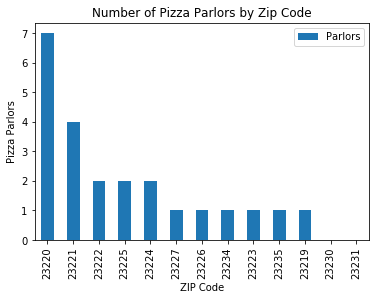

In [181]:
#Basic plot
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
parlor_plot = parlor_simple
parlor_plot["Zip_total_income"] = parlor_plot["Zip_total_income"].apply(str)
#colors = {"12540": ".1", "15050": ".2", "16330": ".3", "20630": ".4", "24430": ".5", "8400": ".6", "2380": ".7", "4170": ".8", "20110": ".9"}
parlor_simple.plot(x="Zip Code", y="Parlors", kind="bar")
plt.xlabel("ZIP Code")
plt.ylabel("Pizza Parlors")
plt.title("Number of Pizza Parlors by Zip Code")
plt.show()

In [ ]:
## Sample code from https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/#colouring-by-a-column
#from matplotlib.patches import Patch
#colours = {"male": "#273c75", "female": "#44bd32"}
#plotdata['pies'].plot(
#        kind="bar", color=plotdata['gender'].replace(colours)
#).legend(
#    [
#        Patch(facecolor=colours['male']),
#        Patch(facecolor=colours['female'])
#    ], ["male", "female"]
#)
#plt.title("Mince Pie Consumption")
#plt.xlabel("Family Member")
#plt.ylabel("Pies Consumed")

In [148]:
/
#data = [23,85, 72, 43, 52]
#labels = ['A', 'B', 'C', 'D', 'E']
#plt.xticks(range(len(data)), labels)
#plt.xlabel('Class')
#plt.ylabel('Amounts')
#plt.title('I am title')
#plt.bar(range(len(data)), data) 
#plt.show()

#from matplotlib import pyplot as plt
#from matplotlib.patches import Patch
#parlor_plot = parlor_simple
#parlor_plot["Zip_total_income"] = parlor_plot["Zip_total_income"].apply(str)
#colors = {"12540": "#1abc9c", "15050": "#2ecc71", "16330": "#3498db", "20630": "#9b59b6", "24430": "#34495e", "8400": "#f1c40f", "2380": "#e67e22", "4170": "#e74c3c", "20110": "#95a5a6"}
#parlor_simple.plot(x="Zip Code", y="Parlors", kind="bar", color = parlor_simple['Zip_total_income'].replace(colors)).legend(
 #                   [
  #                      Patch(facecolor=colors["12540"]),
   #                     Patch(facecolor=colors["15050"]),
    #                    Patch(facecolor=colors["16330"]),
     #                   Patch(facecolor=colors["20630"]),
      #                  Patch(facecolor=colors["24430"]),
       #                 Patch(facecolor=colors["8400"]),
        #                Patch(facecolor=colors["2380"]),
         #               Patch(facecolor=colors["4170"]),
          #              Patch(facecolor=colors["20110"])
           #         ], ["12540","15050","16330","20630","24430","8400","2380","4170","20110"]
            #        )
#plt.xlabel("ZIP Code")
#plt.ylabel("Pizza Parlors")
#plt.title("Number of Pizza Parlors by Zip Code with Color by Income")
#plt.show()

()

In [ ]:
#sample code: parlor_simple['pies'].plot(
   # kind="bar", 
    #color=plotdata['gender'].replace(colours)
    
# Define a dictionary mapping variable values to colours:
#from matplotlib import pyplot as plt
#colors = {"2380": "#d63031", "4170": "#ff7675", "8400": "#e17055", "12540": "#fdcb6e", "15050": "#00b894", "16330": "#0984e3", "20110": "#a29bfe", "24430": "#2d3436"}
#parlor_simple1.plot(data=["counts"],
 #   kind="bar", 
 #   color=parlor_simple1['Zip_total_income'].replace(colors),
 #   index=["ZIP_Name"])


In [149]:
pizza_clusters.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,ZIP_Name,Zip_total_income,Cluster Labels
0,Westhampton,37.574510,-77.512940,Superstars Pizza,37.578604,-77.512979,Pizza Place,23226,8480,2
1,British Camp Farms,37.471175,-77.480526,Little Caesars Pizza,37.469241,-77.483090,Pizza Place,23234,20630,3
2,South Garden,37.485039,-77.495102,Happy Mart,37.485671,-77.498421,Pizza Place,23224,16330,1
3,Broad Rock Sports Complex,37.485454,-77.480757,Albert Pizzeria,37.481285,-77.479027,Pizza Place,23224,16330,1
4,The Museum District,37.562077,-77.474927,Belmont Pizzeria,37.560887,-77.475628,Pizza Place,23221,8400,2


In [150]:
richmond_zips.head()

,Neighborhood,ZIP_Name,Zip_total_income
0,Westhampton,23226,8480
1,Three Chopt,23226,8480
2,Willow lawn,23226,8480
3,Wilton,23226,8480
4,Country Club of Virginia,23226,8480


### Map pizza places, colored by cluster

In [182]:
pizza_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, venue, cluster in zip(pizza_clusters["Venue Latitude"], pizza_clusters["Venue Longitude"], pizza_clusters["Neighborhood"], pizza_clusters['Venue'], pizza_clusters["Cluster Labels"]):
    label = folium.Popup(str(venue ) + " " + str(poi ) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(pizza_map)
       
pizza_map

In [ ]:
#Repeat parlor sorting, by cluster view
#cluster_parlors = pizza_clusters['Cluster Labels'].value_counts().rename_axis('Cluster').reset_index(name="Parlors")
#richmond_zip_income = richmond_zips.drop('Neighborhood', 1)
#richmond_zip_income = richmond_zip_income.rename(columns={"Cluster Labels":"Cluster"})
#cluster_parlors = pd.merge(cluster_parlors, richmond_zip_income, on="ZIP_Name")
#cluster_parlors = cluster_parlors.drop_duplicates()
#cluster_parlors

Check cleaning and outputs one more time.

In [152]:
pizza_clusters1 = pizza_clusters.drop_duplicates(subset=['Venue Latitude', 'Venue Longitude'], keep='first')

In [153]:
pizza_clusters1

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,ZIP_Name,Zip_total_income,Cluster Labels
0,Westhampton,37.574510,-77.512940,Superstars Pizza,37.578604,-77.512979,Pizza Place,23226,8480,2
1,British Camp Farms,37.471175,-77.480526,Little Caesars Pizza,37.469241,-77.483090,Pizza Place,23234,20630,3
2,South Garden,37.485039,-77.495102,Happy Mart,37.485671,-77.498421,Pizza Place,23224,16330,1
3,Broad Rock Sports Complex,37.485454,-77.480757,Albert Pizzeria,37.481285,-77.479027,Pizza Place,23224,16330,1
4,The Museum District,37.562077,-77.474927,Belmont Pizzeria,37.560887,-77.475628,Pizza Place,23221,8400,2
5,The Museum District,37.562077,-77.474927,Chanello's Pizza,37.562546,-77.470796,Pizza Place,23221,8400,2
6,The Museum District,37.562077,-77.474927,Arianna's Grill,37.560928,-77.474042,Pizza Place,23221,8400,2
7,Carytown,37.553235,-77.485542,Mary Angela's Pizza Subs & Pasta,37.554527,-77.484635,Pizza Place,23221,8400,2
8,Brookland Park,37.572536,-77.437698,DaVinci's Pizza,37.571369,-77.436648,Pizza Place,23222,11970,2
9,Providence Park,37.580958,-77.425195,Papa John's Pizza,37.585195,-77.423945,Pizza Place,23222,11970,2


In [154]:
pizza_clusters1.shape

(23, 10)